In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import itertools

In [16]:
df=pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [17]:
df.shape

(2126, 22)

In [18]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [19]:
df.duplicated().sum()

13

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(2113, 22)

In [23]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability       

In [25]:
df['fetal_health'].value_counts()

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64

In [26]:
predictors=df.loc[:,df.columns!='fetal_health']
predictors[0:5]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [27]:
target=df['fetal_health']
target[0:5]

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

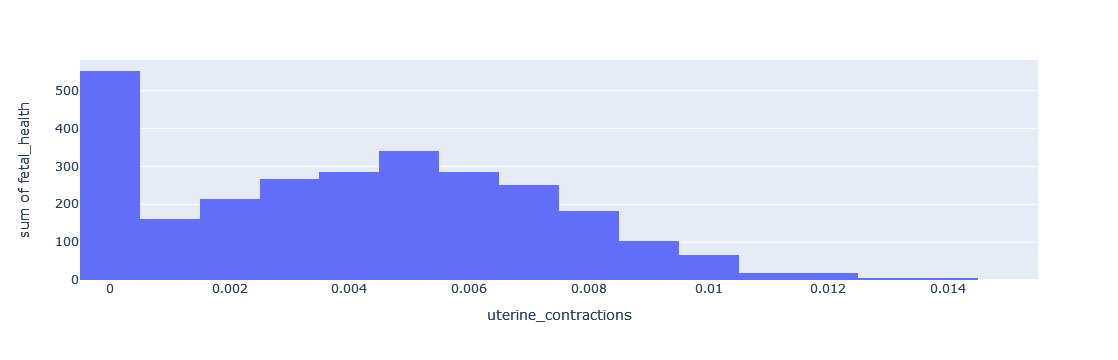

In [28]:
fig = px.histogram(df, x="uterine_contractions", y=df['fetal_health'])
fig.show()

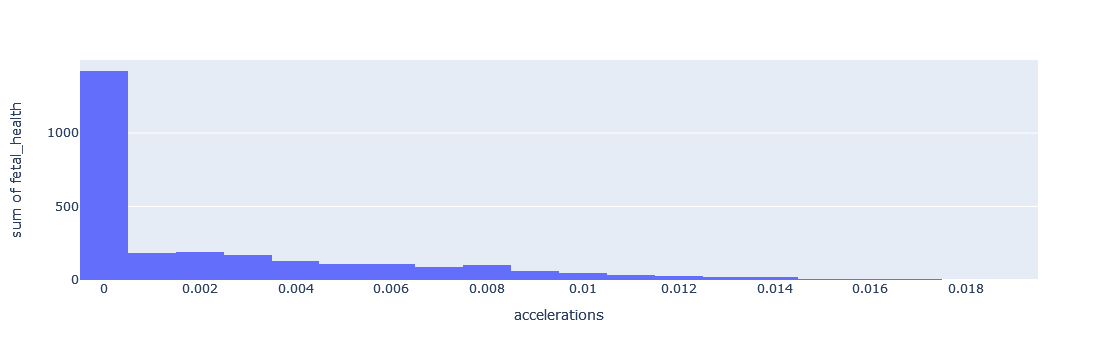

In [29]:
fig = px.histogram(df, x="accelerations", y=df['fetal_health'])
fig.show()

In [30]:
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.081885,-0.033949,-0.149587,-0.159836,-0.053706,-0.105003,0.303502,-0.278344,0.283918,...,0.360129,0.273402,-0.113242,-0.004807,0.708074,0.722152,0.788487,-0.134458,0.294412,0.146077
accelerations,-0.081885,1.000000,0.048114,0.086174,-0.110595,-0.043237,-0.128682,-0.280495,0.206762,-0.373507,...,-0.155306,0.392684,0.189209,-0.007360,0.243083,0.270266,0.272507,0.124433,0.030670,-0.363947
fetal_movement,-0.033949,0.048114,1.000000,-0.069867,0.048795,-0.011022,0.265802,-0.104876,0.121532,-0.074900,...,-0.154297,0.099703,0.164645,-0.018122,-0.061496,-0.089938,-0.072676,0.179115,-0.001459,0.088057
uterine_contractions,-0.149587,0.086174,-0.069867,1.000000,0.282325,0.006416,0.075533,-0.234868,0.289004,-0.306057,...,-0.115445,0.117391,0.080074,0.054975,-0.107352,-0.189689,-0.143001,0.236030,-0.069177,-0.205117
light_decelerations,-0.159836,-0.110595,0.048795,0.282325,1.000000,0.107483,0.224888,-0.119912,0.562265,-0.271542,...,-0.555570,0.216314,0.397093,0.233940,-0.348386,-0.528620,-0.389898,0.563352,0.001977,0.059651
severe_decelerations,-0.053706,-0.043237,-0.011022,0.006416,0.107483,1.000000,0.012303,0.034071,0.034046,-0.030804,...,-0.072162,-0.021438,0.006866,0.043308,-0.215559,-0.158950,-0.160805,0.136356,-0.070501,0.132408
prolongued_decelerations,-0.105003,-0.128682,0.265802,0.075533,0.224888,0.012303,1.000000,0.046360,0.266867,-0.137477,...,-0.277521,0.119492,0.222605,0.055714,-0.437339,-0.489557,-0.445847,0.502976,-0.215226,0.486752
abnormal_short_term_variability,0.303502,-0.280495,-0.104876,-0.234868,-0.119912,0.034071,0.046360,1.000000,-0.428973,0.456708,...,0.278249,-0.113436,-0.169837,-0.150083,0.055694,0.072018,0.117442,-0.147080,-0.010233,0.469671
mean_value_of_short_term_variability,-0.278344,0.206762,0.121532,0.289004,0.562265,0.034046,0.266867,-0.428973,1.000000,-0.469191,...,-0.625601,0.410118,0.502948,0.265669,-0.306681,-0.444696,-0.335175,0.555874,-0.062618,-0.101089
percentage_of_time_with_abnormal_long_term_variability,0.283918,-0.373507,-0.074900,-0.306057,-0.271542,-0.030804,-0.137477,0.456708,-0.469191,1.000000,...,0.427104,-0.285477,-0.279871,-0.121341,0.163879,0.221090,0.185019,-0.281714,0.037646,0.421634


In [31]:
x=preprocessing.StandardScaler().fit(predictors).transform(predictors)

In [32]:
x_train, x_test, y_train, y_test = train_test_split( x, target, test_size=0.2, random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1690, 21) (1690,)
Test set: (423, 21) (423,)


In [33]:
LR = LogisticRegression(C=0.011, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.011, solver='liblinear')

In [34]:
y_pred = LR.predict(x_test)
y_pred

array([1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 1., 2., 3., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 3., 1., 2., 2., 1., 2., 3., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
       3., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 3.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1.

In [35]:
y_prob = LR.predict_proba(x_test)
y_prob

array([[0.46278887, 0.42890875, 0.10830239],
       [0.71989025, 0.06508973, 0.21502002],
       [0.88213593, 0.04181872, 0.07604535],
       ...,
       [0.43925943, 0.42026531, 0.14047526],
       [0.45788577, 0.42982951, 0.11228472],
       [0.72834363, 0.20056895, 0.07108743]])

In [36]:
LR_score=accuracy_score(y_test, y_pred)
LR_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%LR_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.8952
Accuracy: 0.903073


In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       361
         2.0       0.50      0.77      0.61        35
         3.0       0.79      0.81      0.80        27

    accuracy                           0.90       423
   macro avg       0.75      0.84      0.79       423
weighted avg       0.92      0.90      0.91       423



Confusion matrix, without normalization
[[27  0]
 [ 0  0]]


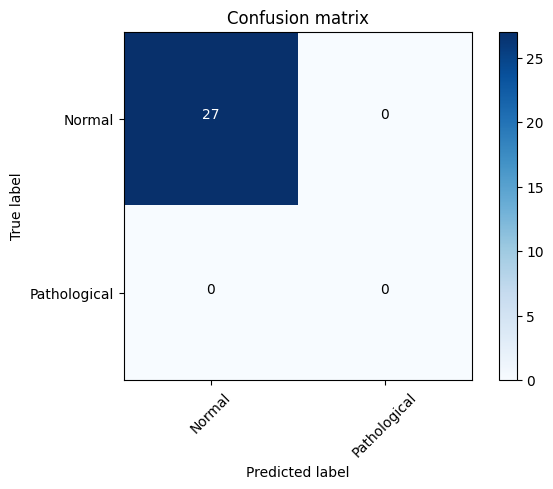

In [39]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[2,4])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal','Pathological'],normalize= False,  title='Confusion matrix')

In [40]:
# Using SVM

In [41]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [42]:
y_pred = clf.predict(x_test)
y_pred [0:5]

array([2., 1., 1., 2., 1.])

In [43]:
SVM_score=accuracy_score(y_test, y_pred)
SVM_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%SVM_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.9332
Accuracy: 0.936170


In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.98      0.94      0.96       355
         2.0       0.67      0.84      0.74        43
         3.0       0.89      1.00      0.94        25

    accuracy                           0.94       423
   macro avg       0.85      0.93      0.88       423
weighted avg       0.95      0.94      0.94       423



Confusion matrix, without normalization
[[36  0]
 [ 0  0]]


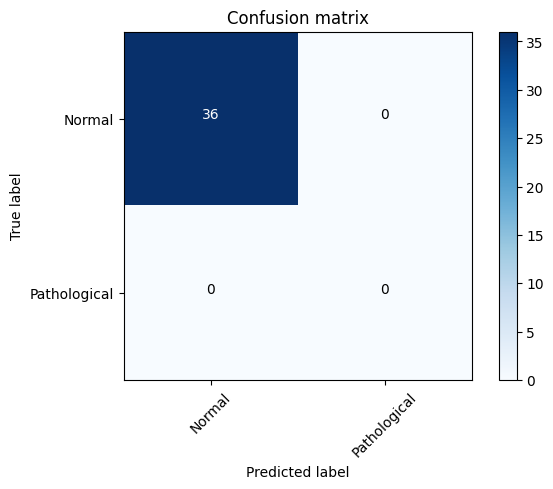

In [45]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[2,4])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal','Pathological'],normalize= False,  title='Confusion matrix')

In [46]:
# Using KNN

In [47]:
x_train_norm = preprocessing.StandardScaler().fit(x_train).transform(x_train)
x_train_norm[0:5]

array([[-3.39192936e-01,  7.24774179e-01, -2.02548054e-01,
         5.34158162e-01, -6.34224896e-01, -6.44921658e-02,
        -2.71626178e-01, -5.32355471e-01, -3.63964084e-01,
        -5.47954235e-01,  2.84161867e-03, -4.21878759e-01,
         2.55184930e-01, -4.95030654e-01,  6.75200930e-01,
         9.66158325e-01, -9.23512544e-02,  1.73189714e-02,
        -7.85027587e-02, -5.19432153e-01, -5.04801563e-01],
       [-1.14571571e+00, -8.18529092e-01, -2.02548054e-01,
        -1.16397445e+00, -6.34224896e-01, -6.44921658e-02,
        -2.71626178e-01, -1.22468386e+00, -2.86382789e-02,
        -3.35425081e-01,  3.06334943e-01, -1.01291957e+00,
         3.90007136e-01, -1.55827041e+00, -1.03301699e+00,
        -4.61121019e-01, -7.07540927e-01, -8.17106032e-01,
        -9.05964270e-01, -5.55340050e-01, -5.04801563e-01],
       [-1.14571571e+00,  4.67556967e-01, -2.02548054e-01,
         5.34158162e-01, -6.34224896e-01, -6.44921658e-02,
        -2.71626178e-01, -8.78519668e-01, -2.52188816e

In [48]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [49]:
x_test_norm = preprocessing.StandardScaler().fit(x_test).transform(x_test)
x_test_norm[0:5]

array([[ 1.15234055e+00, -3.19129839e-01,  2.39614960e-02,
        -7.63549679e-01, -6.69602898e-01, -6.93889390e-17,
        -2.61944952e-01,  1.81557117e+00, -9.19868258e-01,
        -4.80738292e-01,  5.75673825e-01, -5.38327238e-01,
         1.24440056e+00,  8.18542770e-01, -7.54701737e-01,
        -4.56915352e-01,  1.10478425e+00,  1.20492648e+00,
         1.19068217e+00, -4.70849992e-01, -5.89993605e-01],
       [-8.50115880e-01,  4.70296605e-01, -1.61589311e-01,
         6.07921719e-01,  2.39063508e+00, -6.93889390e-17,
        -2.61944952e-01,  8.45278555e-01, -8.64135726e-02,
        -4.80738292e-01, -1.73641418e-01,  5.38206047e-01,
        -7.66674027e-01, -6.12249714e-02,  5.63105630e-01,
         9.04177563e-01, -1.60809964e+00, -8.96468912e-01,
        -1.24547725e+00,  4.00460440e-01, -5.89993605e-01],
       [-1.37707810e+00,  2.57543379e+00, -6.88139073e-02,
        -4.20681830e-01, -6.69602898e-01, -6.93889390e-17,
        -2.61944952e-01, -3.67587214e-01, -8.64135726e

In [50]:
y_pred = neigh.predict(x_test_norm)
y_pred[0:5]

array([1., 1., 1., 2., 2.])

In [51]:
knn_score=accuracy_score(y_test, y_pred)
kNN_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%kNN_F1_SCORE)
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))

F1_score:0.9002
Test set Accuracy:  0.9030732860520094


In [52]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       347
         2.0       0.57      0.67      0.62        46
         3.0       0.89      0.83      0.86        30

    accuracy                           0.90       423
   macro avg       0.81      0.82      0.81       423
weighted avg       0.91      0.90      0.91       423



Confusion matrix, without normalization
[[31  0]
 [ 0  0]]


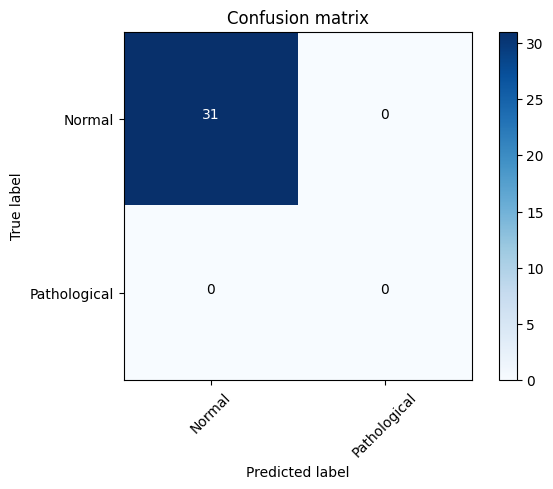

In [53]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[2,4])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal','Pathological'],normalize= False,  title='Confusion matrix')

In [54]:
# Random Forest Classifier

In [55]:
forest = RandomForestClassifier(criterion='gini',random_state=50)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=50)

In [56]:
y_pred = forest.predict(x_test)

In [57]:
rand_score=accuracy_score(y_test, y_pred)
RAnd_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%RAnd_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.9712
Accuracy: 0.971631


In [58]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98       345
         2.0       0.85      0.92      0.88        50
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.95      0.97      0.96       423
weighted avg       0.97      0.97      0.97       423



Confusion matrix, without normalization
[[46  0]
 [ 0  0]]


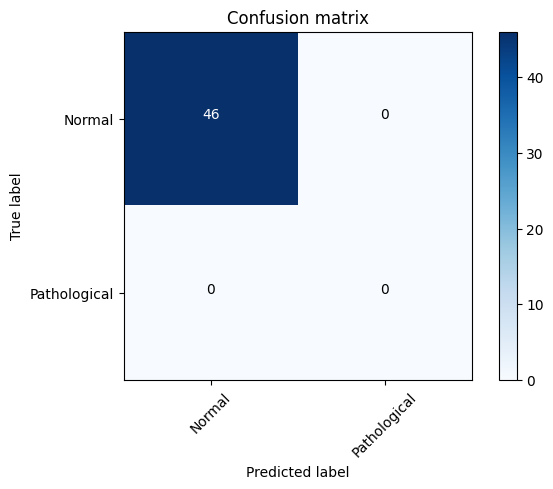

In [59]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[2,4])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal','Pathological'],normalize= False,  title='Confusion matrix')

In [60]:
Accuracy=[LR_score,knn_score,SVM_score,rand_score]
Algorithm=['logistic regression','SVM','KNN','Random forest']
f1_score=[LR_F1_SCORE,kNN_F1_SCORE,SVM_F1_SCORE,RAnd_F1_SCORE]
data={'Algorithm':Algorithm,'Accuracy':Accuracy,'F1_SCORE':f1_score}
Report=pd.DataFrame(data=data)
Report

,Algorithm,Accuracy,F1_SCORE
0,logistic regression,0.903073,0.895217
1,SVM,0.903073,0.900177
2,KNN,0.936170,0.933237
3,Random forest,0.971631,0.971168
